In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import  QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_textbook.tools import array_to_latex

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/home/ludvins/.local/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Compruebe el comportamiento de siguiente circuito y explique porque el resultado es una función de onda entrelazada.

In [6]:
# Create 2 qubits
q = QuantumRegister(2, 'q')
# Create a circuit
circuit = QuantumCircuit(q)

# Applies hadamard gate to the first wbit
circuit.h(q[0])
# Apply cnot gate
circuit.cnot(q[0], q[1])

circuit.x(q[0])

circuit.measure_all()

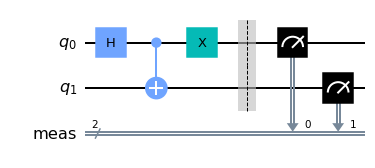

In [7]:
circuit.draw(output='mpl')

Estudiamos analíticamente el circuito. La primera operacion que hacemos es aplicar una puerta de Hadamard al qbit 0 y ninguna transformación al qbit 1. Utilizamos que
$$
H \lvert 0 \rangle \otimes I \lvert 0 \rangle = (H \otimes I)(\lvert 0 \rangle \otimes \lvert 0 \rangle),
$$
y el hecho de que si las distintas puertas se aplican en el orden $G_1 ,\dots, G_n$, las operaciones matriciales se deben realizar en el orden inverso $G_n(G_{n-1}(\dots G_1(q)\dots )$ para construir la matriz correspondiente al circuito. Este caso:
$$
M = (NOT \otimes I)CNOT(H \otimes I)
$$

$$
H \otimes I = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}\otimes  \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 0 & 1 & 0\\ 0 & 1 & 0 & 1\\ 1 & 0 & -1 & 0\\ 0 & 1 & 0 & -1 \end{pmatrix}
$$
$$
CNOT = \begin{pmatrix}1 & 0 & 0 & 0\\0 & 1 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0 \end{pmatrix}
$$
$$
NOT \otimes I = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}\otimes \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} = \begin{pmatrix}0 & 0 & 1 & 0\\0 & 0 & 0 & 1\\ 1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 \end{pmatrix}
$$

Por lo tanto, aplicar todo el circuito es equivalente a:
$$
\begin{aligned}
M \ \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} &= \frac{1}{\sqrt{2}}\begin{pmatrix}0 & 0 & 1 & 0\\0 & 0 & 0 & 1\\ 1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 \end{pmatrix}
\begin{pmatrix}1 & 0 & 0 & 0\\0 & 1 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0 \end{pmatrix}
\begin{pmatrix}1 & 0 & 1 & 0\\ 0 & 1 & 0 & 1\\ 1 & 0 & -1 & 0\\ 0 & 1 & 0 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}\\
&=\frac{1}{\sqrt{2}}\begin{pmatrix}0 & 0 & 0 & 1\\0 & 0 & 1 & 0\\ 1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 \end{pmatrix}
\begin{pmatrix}1 & 0 & 1 & 0\\ 0 & 1 & 0 & 1\\ 1 & 0 & -1 & 0\\ 0 & 1 & 0 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}\\
&= \frac{1}{\sqrt{2}}\begin{pmatrix}0 & 1 & 0 & -1\\ 1 & 0 & -1 & 0\\ 1 & 0 & 1 & 0\\ 0 & 1 & 0 & 1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 0 \\ 1 \\ 1 \\ 0 \end{pmatrix}
\end{aligned}
$$


Demostramos ahora que el restado resultado es un estado entrelazado, para ello veremos que no se puede escribir como la combinacion de 2 estados simples. Supongamos que
$$
\frac{1}{\sqrt{2}}\begin{pmatrix} 0 \\ 1 \\ 1 \\ 0 \end{pmatrix} = \begin{pmatrix} a\\ b  \end{pmatrix} \otimes \begin{pmatrix} c \\ d \end{pmatrix} = \begin{pmatrix} ac \\ ad \\ bc \\ bd \end{pmatrix}.
$$
Lo cual implica que 
$$
ad \neq 0 \implies a, d \neq 0 \quad  \text{y}\quad bc \neq 0 \implies b, c \neq 0 
$$
Pero por otro lado
$$
ac = 0 \implies a = 0 \text{ o } c = 0.
$$

In [8]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(circuit, backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

In [9]:
# Set backend proider
backend = provider.get_backend('ibmq_qasm_simulator')

# Execute the circuit 1024 times
job = execute(circuit, backend, shots=1024)

print('Executing Job...\n')
result = job.result()
counts = result.get_counts(circuit)

print("Results: ", counts)

Executing Job...

Results:  {'01': 487, '10': 537}
